#Introduction to Working with Data in Python: Cleaning and Munging

###Goals

- Become familiar with basic tools and methods for data munging and cleaning in Python

Tasks

- Learn a little history of Python & iPython
- Start an iPython Notebook server, create an notebook and navigate around the notebook 
- Connect to a database using psycopg2
- Perform queries using python
- Load data from a database using read_sql
- Load data from a csv into a pandas dataframe 
- Write a function that changes column names to snake_case
- Convert date strings to datetime values
- Count and remove missing values
- Fill missing values with an interpolation
- Apply a function to a column to add random noise for annonymization
 

#Background on Python, iPython, and Pandas

[Python](https://www.python.org/) is a high-level general purpose programming language named after a [British comedy troup](https://www.youtube.com/user/MontyPython), created by a [Dutch benevolent dictator](http://en.wikipedia.org/wiki/Guido_van_Rossum) and maintained by an international group of fiendly but opinionated python enthusiasts (`import this!`). 

It's popular for data science because it's powerful, fast, plays well with others, runs everywhere, is easy to learn, highly readable, and open. Because it's general purpose it can be used for full-stack development. It's got a growing list of useful libraries for scientitic programming, data manipulation, data analysis. (Numpy, Scipy, Pandas, Scikit-Learn, Statsmodels, Matplotlib, Pybrain, etc.)

[iPython](http://ipython.org/) is an enhanced, interactive python interpreter started as a grad school project by [Fernando Perez](http://fperez.org/). iPython (jupyter) notebooks allow you to run a multi-language (Python, R, Julia, Markdown, LaTex, etc) interpreter in your browser to create rich, portable, and sharable code documents.

[Pandas](http://pandas.pydata.org/) is a libary created by [Wes McKinney](http://blog.wesmckinney.com/) that introduces the R-like dataframe object to Python and makes working with data in Python a lot easier. It's also a lot more efficient than the R dataframe and pretty much makes Python superior to R in every imaginable way (except for ggplot 2). 

##Getting started with iPython Notebooks

To start up an iPython notebook server, simply navigate to the directory where you want the notebooks to be saved and run the command

```
ipython notebook
```

A browser should open with a notebook navigator. Click the "New" button and select "Python 2".

A beautiful blank notebook should open in a new tab

Name the notebook by clicking on "Untitled" at the top of the page.

Notebooks are squences of cells. Cells can be markdown, code, or raw text. Change the first cell to markdown and briefly describe what you are going to do in the notebook. 

##Working with databases using python

Often we want to get data from a database. To do this, we use the `psycopg2` library. It's good practice to use try-expect when you are establishing the connection so you know if it failed. 

In [10]:
import psycopg2
import os

try: 
    #This is the basic synatx
    #connection = psycopg2.connect("dbname='training_2015' user='username' host='dssgsummer2014postgres.c5faqozfo86k.us-west-2.rds.amazonaws.com' password='password' port='5432'")
    
    #I prefer to hide my database connection strings in 
    connection = psycopg2.connect(os.environ["DOL_DB_PY"])
except:
    print "Failed to connect"

Now that we're connected, we need to create something called a cursor

In [11]:
cur = connection.cursor()

Now we can start writing queries using the `execute` method and passing it sql statements.

In [15]:
cur.execute("""SELECT * FROM mgee.Building_Violations_sample_50000""")

We then use the read_sql function to create a new dataframe based on the results of our query

##Getting started with Pandas

We start by importing the libraries we're going to use: `pandas` and `matplotlib`

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

##Loading data into a DataFrame

The pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes. It's basically a spreadsheet you can program and it's an incredibly useful Python object for data analysis. 

You can load data into a dataframe using Pandas' excellent `read_*` functions.

We're going to try two of them: read_csv and read_sql

Pro tip: jupyter will pull of the doc string for a command just by asking it a question

In [5]:
pd.read_sql?
pd.read_csv?


Loading data using sql is really straightforward. Using our previously defined connection, we can write a sql query that 

In [7]:
df = pd.read_sql("SELECT * FROM building_violations_sample_50000", connection)

Don't forget to clean up after yourself by closing the connection.

In [7]:
connection.close()

**Now let's read data in from a csv**

In [8]:
df = pd.read_csv('/Users/matthewgee/Building_Violations_sample_50000.csv')
#don't forget to check out tab completion in iPython!


/Users/matthewgee/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


##Viewing your dataframe

Just like we did in the command line, you can use `head` and `tail` to get a view of your data.

In [9]:
df.head()
df.tail(3)

,Unnamed: 0,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,...,INSPECTION STATUS,INSPECTION WAIVED,INSPECTION CATEGORY,DEPARTMENT BUREAU,ADDRESS,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
49997,49997,1430847,10/14/2008,01/01/2006,CN031013,COMPLIED,07/10/2008,"FIRE EXTNGSHR REQ, RESDNTL",NaN,ALL ELEVATION MISSING FIRE EXTINGUISHER,...,FAILED,N,PERIODIC,CONSERVATION,6501 S LOWE AVE,19693,NaN,41.776074,-87.640625,"(41.7760739361563,-87.64062455203374)"
49998,49998,1734149,09/16/2008,01/01/2006,CN135016,COMPLIED,09/05/2008,MICE/RODENTS,NaN,MICE ON PREMISES,...,FAILED,N,PERIODIC,CONSERVATION,4836 S INDIANA AVE,18261,NaN,41.806381,-87.621283,"(41.80638088214982,-87.62128295874425)"
49999,49999,1834762,01/12/2007,01/01/2006,CN190019,COMPLIED,01/11/2007,ARRANGE PREMISE INSPECTION,NaN,NO ENTRY TO INTERIOR TO VERIFY OCCUPANCY AND D...,...,FAILED,N,PERIODIC,CONSERVATION,200 N KOSTNER AVE,1531,NaN,41.883310,-87.735709,"(41.88330951242491,-87.73570901056128)"


We can get a sense for the size and shape of the data using `shape`

In [10]:
df.shape

(50000, 23)

Get a sense for the type of each column using `dtypes`

In [11]:
df.dtypes

Unnamed: 0                        int64
ID                                int64
VIOLATION LAST MODIFIED DATE     object
VIOLATION DATE                   object
VIOLATION CODE                   object
VIOLATION STATUS                 object
VIOLATION STATUS DATE            object
VIOLATION DESCRIPTION            object
VIOLATION LOCATION               object
VIOLATION INSPECTOR COMMENTS     object
VIOLATION ORDINANCE              object
INSPECTOR ID                     object
INSPECTION NUMBER                 int64
INSPECTION STATUS                object
INSPECTION WAIVED                object
INSPECTION CATEGORY              object
DEPARTMENT BUREAU                object
ADDRESS                          object
PROPERTY GROUP                    int64
SSA                              object
LATITUDE                        float64
LONGITUDE                       float64
LOCATION                         object
dtype: object

Unnamed is a useless column. Let's get rid of it.

In [12]:
del df['Unnamed: 0']

##Cleaning up column names

Notice that the column names have spaces. 

In [13]:
df.columns

Index([u'ID', u'VIOLATION LAST MODIFIED DATE', u'VIOLATION DATE', u'VIOLATION CODE', u'VIOLATION STATUS', u'VIOLATION STATUS DATE', u'VIOLATION DESCRIPTION', u'VIOLATION LOCATION', u'VIOLATION INSPECTOR COMMENTS', u'VIOLATION ORDINANCE', u'INSPECTOR ID', u'INSPECTION NUMBER', u'INSPECTION STATUS', u'INSPECTION WAIVED', u'INSPECTION CATEGORY', u'DEPARTMENT BUREAU', u'ADDRESS', u'PROPERTY GROUP', u'SSA', u'LATITUDE', u'LONGITUDE', u'LOCATION'], dtype='object')

That's a bummer because columns without spaces in their names allow us to take a shortcut in selecting columns. 

Instead of referencing columns like this

```
df['VIOLATION STATUS DATE']
```

we would love to be able to use tab completion and reference the columns like this

```
df.violation_status_date
```

Let's fix it, and learn a little about defining python functions, real expressions, and list comprehension in the process.

In [14]:
import re

def spaces_to_snake(column_name):
    """
    converts a string that has spaces into snake_case
    Example:
        print camel_to_snake("KENNY BROUGHT HIS WIFE")
        > KENNY_BROUGHT_HIS_WIFE
    To see how to apply this to camel case, see:
        http://stackoverflow.com/questions/1175208/elegant-python-function-to-convert-camelcase-to-camel-case
    """
    s = re.sub(r"\s+", '_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]

#Note: a much more elegant and pythonic way to do this would be to use the rename method and lambda syntax (e.g. df.rename(columns=lambda x: x.replace(" ", "_"))), but we'll cover this later.


In [15]:
df.columns

Index([u'id', u'violation_last_modified_date', u'violation_date', u'violation_code', u'violation_status', u'violation_status_date', u'violation_description', u'violation_location', u'violation_inspector_comments', u'violation_ordinance', u'inspector_id', u'inspection_number', u'inspection_status', u'inspection_waived', u'inspection_category', u'department_bureau', u'address', u'property_group', u'ssa', u'latitude', u'longitude', u'location'], dtype='object')

In [16]:
df.dtypes

id                                int64
violation_last_modified_date     object
violation_date                   object
violation_code                   object
violation_status                 object
violation_status_date            object
violation_description            object
violation_location               object
violation_inspector_comments     object
violation_ordinance              object
inspector_id                     object
inspection_number                 int64
inspection_status                object
inspection_waived                object
inspection_category              object
department_bureau                object
address                          object
property_group                    int64
ssa                              object
latitude                        float64
longitude                       float64
location                         object
dtype: object

Great. Now we can to reference columns using `df.variable_name` syntax.


In [17]:
df.violation_description.head() #don't forget to try tab completion!

0                    REPAIR LINTELS
1    PIPE OPENING W/NONCOMBUST MATL
2                   MAINTAIN WINDOW
3        POST OWNER/MANAGERS NAME/#
4     REPLCE WINDOW PANES, PLEXGLAS
Name: violation_description, dtype: object

##Converting to datetime

Pandas has some fantastic methods for timeseries data. We need to convert the date columns (currently strings) to datetimes. 

In [18]:
df.violation_date = pd.to_datetime(df.violation_date)
df.violation_date.head()

0   2015-05-21
1   2015-05-21
2   2015-05-21
3   2015-05-21
4   2015-05-21
Name: violation_date, dtype: datetime64[ns]

Try writing code that will change all the date columns to datetimes with as few lines as possible.

##Basic views into the data

Lets get a better sense what these fields look like. 

Let's start by describing the entire dataset using the describe command.

In [19]:
df.describe()

,id,inspection_number,property_group,latitude,longitude
count,50000.000000,50000.000000,50000.000000,49952.000000,49952.000000
mean,3300031.329640,6195288.986320,197729.741420,41.845539,-87.673442
std,1088123.083684,4296079.998463,183132.260836,0.087437,0.057008
min,742158.000000,375113.000000,1001.000000,41.644712,-87.914436
25%,2400057.500000,2021217.500000,20600.750000,41.771440,-87.714271
50%,3421152.000000,2813561.000000,142605.000000,41.854001,-87.670709
75%,4223617.750000,10630848.750000,363929.250000,41.912843,-87.634551
max,5064815.000000,11597625.000000,663759.000000,42.022645,-87.525898


It looks like `describe` only works on numerical columns. For categorical, we can use `value_counts`.

In [20]:
pd.value_counts(df.inspection_status)

FAILED    38371
PASSED     6426
CLOSED     5199
HOLD          4
dtype: int64

Let's see if there are missing values.

In [21]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    44705
True      5295
dtype: int64

What if we wanted to fill or drop the missing values? We can use `fillna` and `dropna`

In [22]:
df.violation_inspector_comments = df.violation_inspector_comments.fillna('No Comment')

In [23]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    50000
dtype: int64

##Selecting and Subsetting Data

Let's say we just wanted to work with the inspectors that left no comments. We can subset using conditional logic.

In [24]:
df[df.violation_inspector_comments=='No Comment'].head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location
13,5063459,05/20/2015,2015-05-20,CN193019,OPEN,NaN,REPAIR/WRECK DANGER RESID PREM,NaN,No Comment,Repair or wreck dangerous and vacant residenti...,...,CLOSED,N,COMPLAINT,DEMOLITION,3051 S BROAD ST,285348,NaN,41.838454,-87.660979,"(41.83845438362799,-87.6609787384341)"
15,5063885,05/21/2015,2015-05-20,BR1001,OPEN,NaN,OWNER OR LICENSED CONTRACTOR,NaN,No Comment,The code violations listed below must be corre...,...,CLOSED,N,PERIODIC,BOILER,6448 S TRIPP AVE,387870,NaN,41.775328,-87.728922,"(41.775328312329904,-87.72892174006991)"
16,5063912,05/21/2015,2015-05-20,PL151137,OPEN,NaN,OPEN,NaN,No Comment,NaN,...,FAILED,N,PERMIT,PLUMBING,3835 W CERMAK RD,280823,NaN,41.851485,-87.721159,"(41.85148492680666,-87.72115941535648)"
18,5063320,05/20/2015,2015-05-20,CN193019,OPEN,NaN,REPAIR/WRECK DANGER RESID PREM,NaN,No Comment,Repair or wreck dangerous and vacant residenti...,...,CLOSED,N,COMPLAINT,DEMOLITION,11025 S ESMOND ST,516079,NaN,41.693018,-87.667286,"(41.69301757344688,-87.66728567428113)"
20,5064410,05/20/2015,2015-05-20,CN193039,OPEN,NaN,POST OWNER NAME OF VACNT BLDG,NaN,No Comment,"Post conspicuously name, address, and telephon...",...,CLOSED,N,COMPLAINT,DEMOLITION,6928 S KIMBARK AVE,393870,NaN,41.769012,-87.594164,"(41.76901189738516,-87.59416364991507)"


We can also subset using indexing like R.

You can slice a Series by range using the [] operator

In [25]:
df.violation_status[3:10]

3    OPEN
4    OPEN
5    OPEN
6    OPEN
7    OPEN
8    OPEN
9    OPEN
Name: violation_status, dtype: object

Or by location in the DataFram using the `.iloc` method

In [26]:
df.iloc[3:10,1:4]

,violation_last_modified_date,violation_date,violation_code
3,05/21/2015,2015-05-21,CN196029
4,05/21/2015,2015-05-21,CN104015
5,05/21/2015,2015-05-21,CN190019
6,05/21/2015,2015-05-21,CN015062
7,05/21/2015,2015-05-21,CN065034
8,05/21/2015,2015-05-21,CN196029
9,05/21/2015,2015-05-21,CN190019


The `.ix` method supports lookup by label as well as integers.

##Applying functions

Often we want to apply a function to an entire column to create a new column. You can do this by using the `apply` method. Let's say we wanted to add noise to the

In [27]:
df['log_lat'] = df.latitude.apply(np.log)
df[['latitude','log_lat']].head()

,latitude,log_lat
0,41.733089,3.731294
1,41.777088,3.732348
2,41.937995,3.736192
3,41.937995,3.736192
4,41.791470,3.732692


Let's say we wanted to anonlymize location by add noise to the latitude. We can do this using apply with `lambda` syntax.

In [28]:
df['new_lat'] = df.latitude.apply(lambda x: x + np.random.rand())


In [29]:
df[['latitude','new_lat','log_lat']].head()

,latitude,new_lat,log_lat
0,41.733089,42.698813,3.731294
1,41.777088,41.857313,3.732348
2,41.937995,42.054158,3.736192
3,41.937995,42.774825,3.736192
4,41.791470,42.134593,3.732692


##Exporting data

Pandas supports saving DataFrames to a variety of file formats using the `to_*` function. Let's save our updated data as a csv.

In [30]:
df.to_csv("/Users/matthewgee/Buildings_Violations_sample_50000_clean.csv")

##Groupby

Often we want to examine difference among groups based on categorical values. For this `groupby` is incredibly valuable

In [31]:
df[['department_bureau','longitude','latitude']].groupby("department_bureau").mean()

,longitude,latitude
department_bureau,,
BOILER,-87.670488,41.841682
CONSERVATION,-87.673469,41.846195
CONSTRUCTION EQUIPMENT,-87.684458,41.928653
DEMOLITION,-87.669775,41.807409
ELECTRICAL,-87.670183,41.839267
ELEVATOR,-87.659214,41.900869
IRON,-87.671767,41.906648
NEW CONSTRUCTION,-87.683687,41.863878
PLUMBING,-87.663690,41.817108


##Data munging challenges

Write a custom function and apply it.
Use groupby to understand frequencies of different violations 

Find an application for:

```
pivot
pivot_tables
stack/unstack
melt
get_dummies
factorize
```

##Groupby and Plotting!

In [32]:
df.columns

Index([u'id', u'violation_last_modified_date', u'violation_date', u'violation_code', u'violation_status', u'violation_status_date', u'violation_description', u'violation_location', u'violation_inspector_comments', u'violation_ordinance', u'inspector_id', u'inspection_number', u'inspection_status', u'inspection_waived', u'inspection_category', u'department_bureau', u'address', u'property_group', u'ssa', u'latitude', u'longitude', u'location', u'log_lat', u'new_lat'], dtype='object')

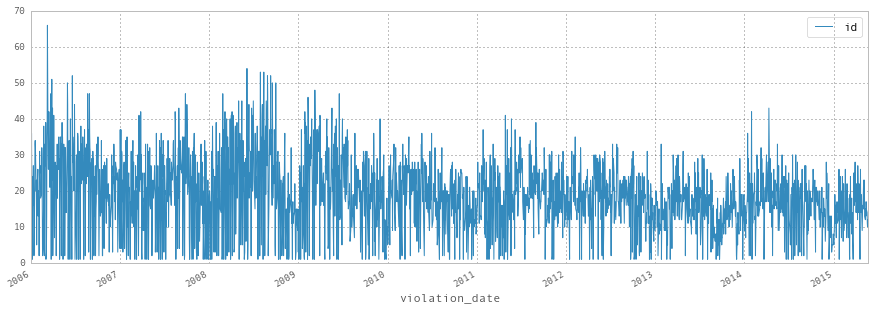

In [33]:
grouped = df[['violation_date','id']].groupby(['violation_date']).count().plot(figsize=(15,5))

In [69]:
grouped

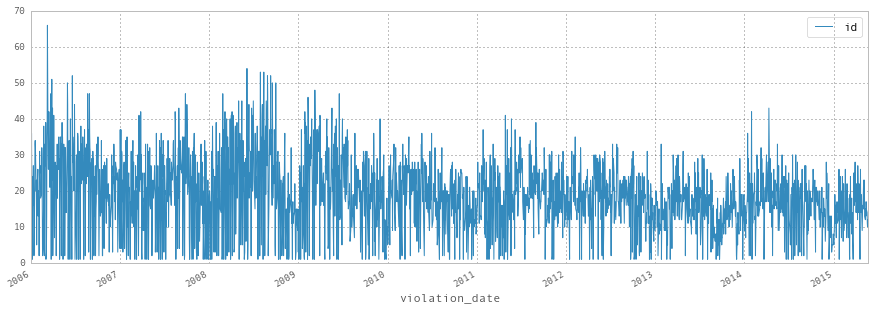

In [38]:
grouped = df[['violation_date','id']].groupby(['violation_date']).count().plot(figsize=(15,5))

In [39]:
df.dtypes

id                                       int64
violation_last_modified_date            object
violation_date                  datetime64[ns]
violation_code                          object
violation_status                        object
violation_status_date                   object
violation_description                   object
violation_location                      object
violation_inspector_comments            object
violation_ordinance                     object
inspector_id                            object
inspection_number                        int64
inspection_status                       object
inspection_waived                       object
inspection_category                     object
department_bureau                       object
address                                 object
property_group                           int64
ssa                                     object
latitude                               float64
longitude                              float64
location     

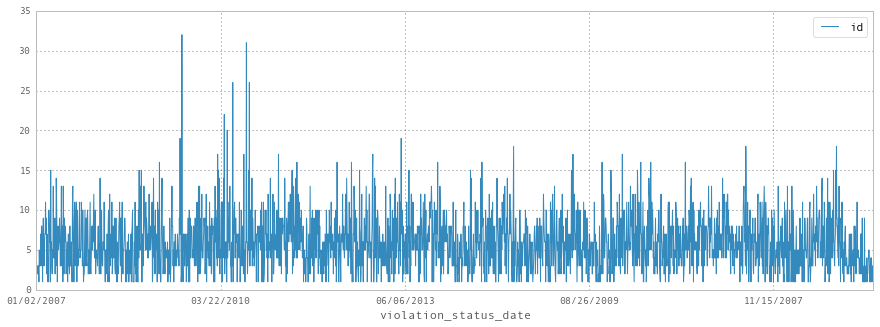

In [40]:
grouped = df[['violation_status_date','id']].groupby(['violation_status_date']).count().plot(figsize=(15,5))

In [41]:
df.violation_status_date = pd.to_datetime(df.violation_status_date)

In [42]:
df.dtypes

id                                       int64
violation_last_modified_date            object
violation_date                  datetime64[ns]
violation_code                          object
violation_status                        object
violation_status_date           datetime64[ns]
violation_description                   object
violation_location                      object
violation_inspector_comments            object
violation_ordinance                     object
inspector_id                            object
inspection_number                        int64
inspection_status                       object
inspection_waived                       object
inspection_category                     object
department_bureau                       object
address                                 object
property_group                           int64
ssa                                     object
latitude                               float64
longitude                              float64
location     

In [43]:
violate_status_count = df[['violation_status_date','id']].groupby(['violation_status_date']).count()
violate_status_count.head()

,id
violation_status_date,
2006-01-11,1
2006-01-23,1
2006-02-15,1
2006-02-17,1
2006-02-22,2


In [44]:
violate_status_count['2011-01']

,id
violation_status_date,
2011-01-03,5
2011-01-04,8
2011-01-05,3
2011-01-06,11
2011-01-07,4
2011-01-10,3
2011-01-11,6
2011-01-12,7
2011-01-13,1


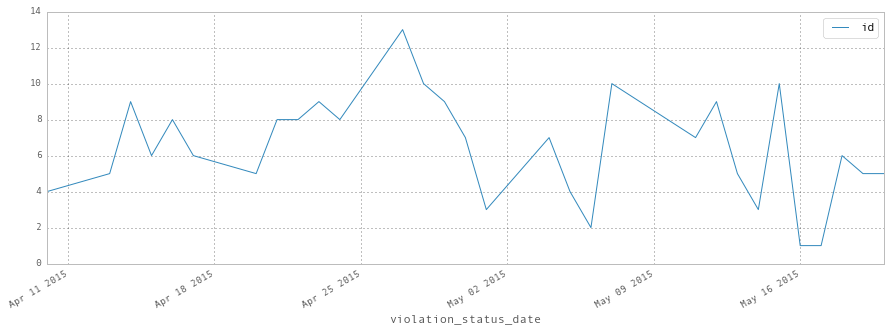

In [45]:
plt = violate_status_count['2015-04-10':].plot(figsize=(15,5))

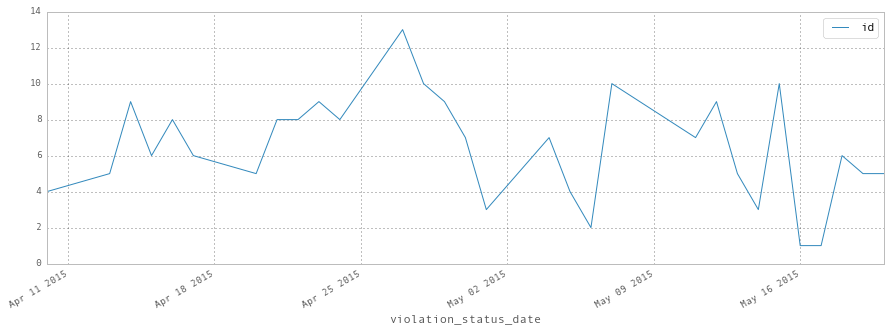

In [46]:
plt = violate_status_count['2015-04-10':].plot(figsize=(15,5))

In [61]:
df1 = df[df['violation_status']=='OPEN']
grouped_open = df1[['violation_date','violation_status','inspection_category','id']].groupby(['violation_date','violation_status','inspection_category']).count()
grouped_open.head()

id
violation_date violation_status inspection_category    
2006-01-01     OPEN             PERIODIC              2
2006-01-02     OPEN             COMPLAINT             1
                                PERIODIC             27
2006-01-03     OPEN             COMPLAINT            14
                                PERIODIC              1

In [62]:
grouped_open.reset_index(inplace=True)
grouped_open.head()

,violation_date,violation_status,inspection_category,id
0,2006-01-01,OPEN,PERIODIC,2
1,2006-01-02,OPEN,COMPLAINT,1
2,2006-01-02,OPEN,PERIODIC,27
3,2006-01-03,OPEN,COMPLAINT,14
4,2006-01-03,OPEN,PERIODIC,1


In [63]:
grouped_open_categ = grouped_open.pivot_table('id','violation_date','inspection_category')
grouped_open_categ.head()

inspection_category,COMPLAINT,PERIODIC,PERMIT,REGISTRATION
violation_date,,,,
2006-01-01,NaN,2,NaN,NaN
2006-01-02,1,27,NaN,NaN
2006-01-03,14,1,NaN,NaN
2006-01-04,31,2,NaN,NaN
2006-01-05,14,1,NaN,NaN
2006-01-06,15,NaN,NaN,NaN
2006-01-07,1,NaN,NaN,NaN
2006-01-09,10,1,NaN,NaN
2006-01-10,13,NaN,NaN,NaN


In [65]:
grouped_open_categ.head()

inspection_category,COMPLAINT,PERIODIC,PERMIT,REGISTRATION
violation_date,,,,
2006-01-01,NaN,2,NaN,NaN
2006-01-02,1,27,NaN,NaN
2006-01-03,14,1,NaN,NaN
2006-01-04,31,2,NaN,NaN
2006-01-05,14,1,NaN,NaN


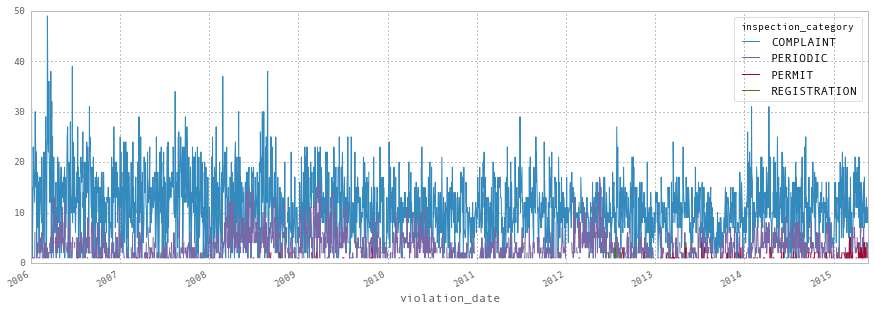

In [68]:
grouped_open_categ.plot(figsize=(15,5))